# Filter

In [1]:
## import packages
import numpy as np
from PIL import Image
from scipy.signal import convolve2d as conv2
import matplotlib.pyplot as plt

import gauss_module



def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

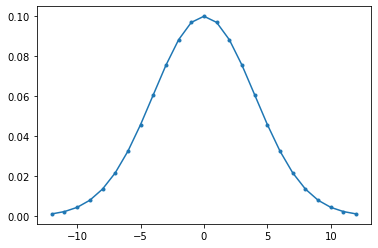

In [2]:
## function gauss (Question 1.a)

sigma = 4.0
[Gx, x] = gauss_module.gauss(sigma)

plt.figure(1)
plt.plot(x, Gx, '.-')
plt.show()

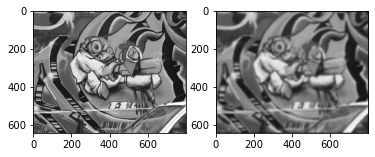

In [3]:
## function gaussianfilter (Question 1.b)

img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = gauss_module.gaussianfilter(img, sigma)

plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

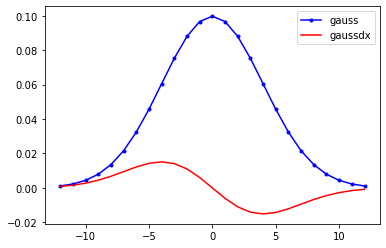

In [4]:
## function gaussdx (Question 1.c)
sigma = 4.0
[Gx, x] = gauss_module.gauss(sigma)
[Dx, x] = gauss_module.gaussdx(sigma)

plt.figure(5)
plt.plot(x, Gx, 'b.-')
plt.plot(x, Dx, 'r-')
plt.legend( ('gauss', 'gaussdx'))
plt.show()

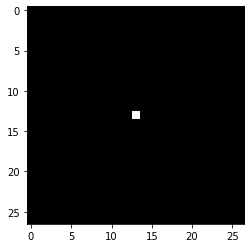

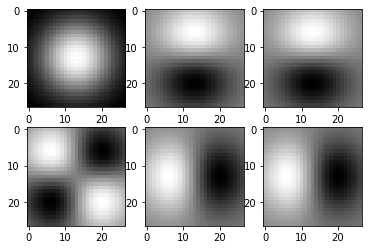

In [5]:
##1.d - report part
img_imp = np.zeros([27,27])
img_imp[13, 13] = 1.0
plt.figure(6), plt.imshow(img_imp, cmap='gray')

sigma = 7.0
[Gx, x] = gauss_module.gauss(sigma)
[Dx, x] = gauss_module.gaussdx(sigma)

Gx = Gx.reshape(1, Gx.size)
Dx = Dx.reshape(1, Dx.size)

plt.figure(7)
plt.subplot(2,3,1)
plt.imshow(conv2(conv2(img_imp, Gx, 'same'), Gx.T, 'same') , cmap='gray')
plt.subplot(2,3,2)
plt.imshow(conv2(conv2(img_imp, Gx, 'same'), Dx.T, 'same') , cmap='gray') ##derivative filter in y
plt.subplot(2,3,3)
plt.imshow(conv2(conv2(img_imp, Dx.T, 'same'), Gx, 'same') , cmap='gray') ##derivative filter in y
plt.subplot(2,3,4)
plt.imshow(conv2(conv2(img_imp, Dx, 'same'), Dx.T, 'same') , cmap='gray')
plt.subplot(2,3,5)
plt.imshow(conv2(conv2(img_imp, Dx, 'same'), Gx.T, 'same') , cmap='gray') ##derivative filter in x
plt.subplot(2,3,6)
plt.imshow(conv2(conv2(img_imp, Gx.T, 'same'), Dx, 'same') , cmap='gray') ##derivative filter in x
plt.show()

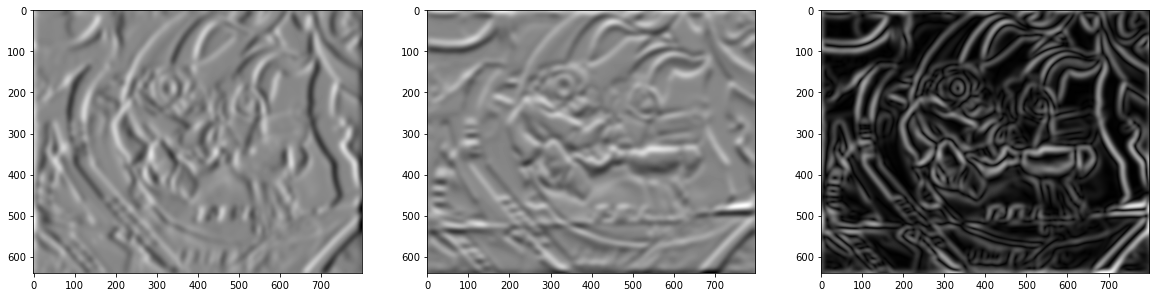

In [6]:
##1.e derivative filter
img_c = np.array(Image.open('graf.png')).astype('double')
img = rgb2gray(img_c)
[imgDx, imgDy] = gauss_module.gaussderiv(img, 7.0)

plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
plt.sca(ax1)
plt.imshow(imgDx, cmap='gray')  ##Derivative filter x direction
plt.sca(ax2)
plt.imshow(imgDy, cmap='gray')  ##Derivative filter y direction
plt.sca(ax3)
imgmag = np.sqrt(imgDx**2 + imgDy**2)  ##Magnitude
plt.imshow(imgmag, cmap='gray')
plt.show()

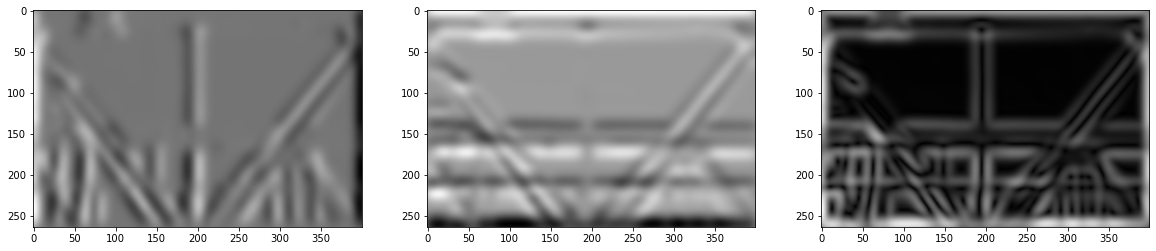

In [7]:
img_c = np.array(Image.open('gantrycrane.png')).astype('double')
img = rgb2gray(img_c)
[imgDx, imgDy] = gauss_module.gaussderiv(img, 7.0)

plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
plt.sca(ax1)
plt.imshow(imgDx, cmap='gray')  ##Derivative filter x direction
plt.sca(ax2)
plt.imshow(imgDy, cmap='gray')  ##Derivative filter y direction
plt.sca(ax3)
imgmag = np.sqrt(imgDx**2 + imgDy**2)  ##Magnitude
plt.imshow(imgmag, cmap='gray')
plt.show()